In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [179]:
path = 'C:/Users/Johan/Dropbox (Institut für Statistik)/Structural Breaks + DL/Figures/'

In [114]:
obs_total = 5000*0.9*0.8     # no. of training obs.

In [249]:
SMALL_SIZE = 26
MEDIUM_SIZE = 28
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

### No batch EWS weights

In [195]:
step = 0
weights = []
for i in range(int(obs_total)):
    step += 1 # mean period of batch
    weights.append(alpha**(obs_total-(step-1)))  # batch weight

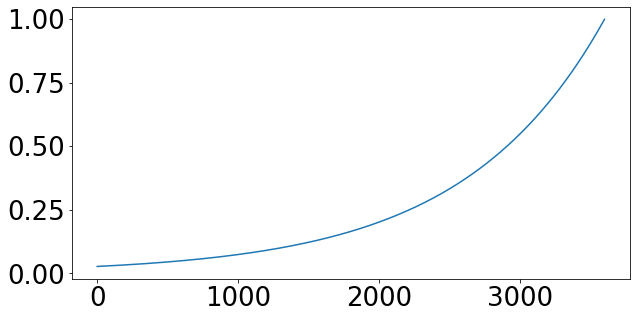

In [196]:
plt.figure(figsize=(10,5))
plt.plot(weights)
plt.show()

### Plot one batch size

In [197]:
batch_size = 64
batch_no = int(obs_total//batch_size)
alpha = 0.999

In [198]:
step = 1
mean_t = 0
batch_weights = []
for i in range(batch_no):
    mean_t = np.mean(np.arange(step,step+batch_size+1)) # mean period of batch
    batch_weights.append(alpha**(obs_total-(mean_t-1)))  # batch weight
    step += batch_size

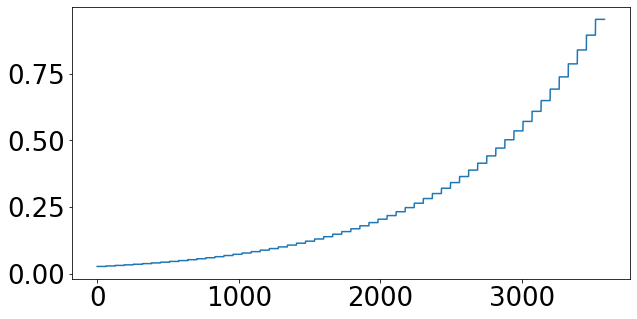

In [199]:
plt.figure(figsize=(10,5))
plt.plot(np.repeat(batch_weights,batch_size))
plt.show()

### Plot multiple batch sizes

In [233]:
batch_size = np.array([1,32,128])
alpha = np.array([0.995, 0.999, 0.9995])

In [239]:
cmap = plt.get_cmap("tab20c")

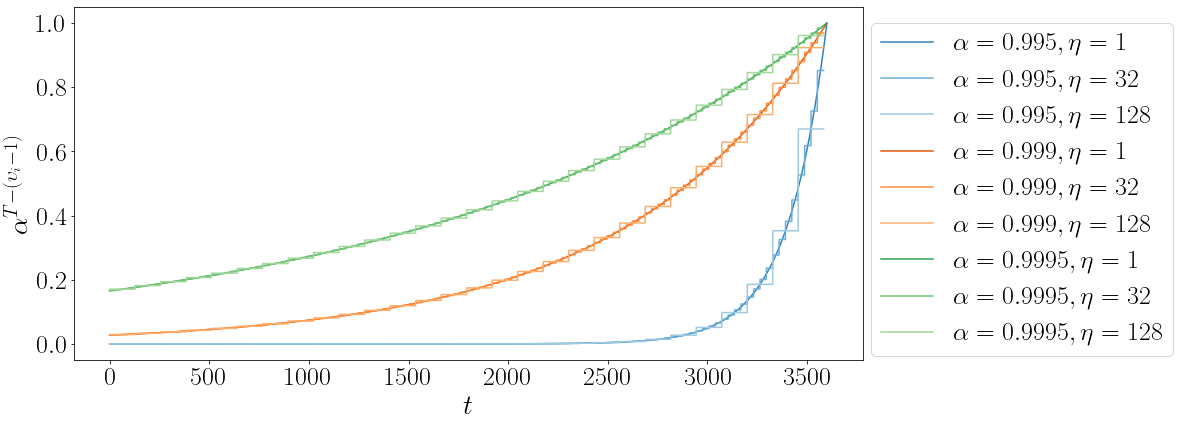

In [250]:
plt.figure(figsize=(17,6.5))
add = 0
for k in range(alpha.shape[0]):
    for j in range(batch_size.shape[0]):
        batch_no = int(obs_total//batch_size[j])
        step = 1
        mean_t = 0
        batch_weights = []
        for i in range(batch_no):
            mean_t = np.mean(np.arange(step,step+batch_size[j]+1)) # mean period of batch
            batch_weights.append(alpha[k]**(obs_total-(mean_t-1)))  # batch weight
            step += batch_size[j]
        plt.plot(np.repeat(batch_weights,batch_size[j]),label=r'$\alpha=%s, \eta=%s$' % (alpha[k],batch_size[j]), color=cmap(j+add), linestyle='-')
    add += 4
plt.xlabel(r'$t$')
plt.ylabel(r'$\alpha^{T-(\upsilon_i-1)}$')
plt.legend(loc=(1.01, 0.01))
plt.tight_layout()
plt.savefig(path+'EWSlossweights.pdf', bbox_inches='tight')
plt.show()